In [1]:
from obspy import read

In [8]:
st = read ('2021-10-07-mww59-near-east-coast-of-honshu-japan.miniseed')
print(st)

502 Trace(s) in Stream:

AU.MCQ.00.BHE | 2021-10-07T13:53:23.000000Z - 2021-10-07T14:04:23.000000Z | 40.0 Hz, 26401 samples
...
(500 other traces)
...
CI.PASC.10.BHZ | 2021-10-07T13:52:20.994500Z - 2021-10-07T14:03:20.994500Z | 40.0 Hz, 26401 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [13]:
tr = st[0]
print(tr)

AU.MCQ.00.BHE | 2021-10-07T13:53:23.000000Z - 2021-10-07T14:04:23.000000Z | 40.0 Hz, 26401 samples


In [14]:
data = tr.data
print(data)

[-4186 -4125 -4078 ...,  1895  1984  1991]


In [15]:
print(tr.stats)

         network: AU
         station: MCQ
        location: 00
         channel: BHE
       starttime: 2021-10-07T13:53:23.000000Z
         endtime: 2021-10-07T14:04:23.000000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 26401
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 68, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 19779072})


In [16]:
print(tr.stats.network)
print(tr.stats.npts)

AU
26401


Matplotlib is building the font cache; this may take a moment.


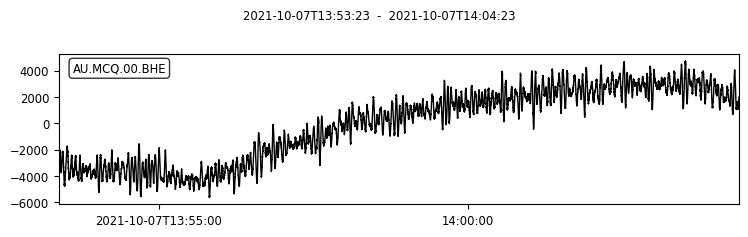

In [17]:
tr.plot();

In [2]:
from obspy.clients.fdsn import Client

client = Client('IRIS')

In [3]:
from obspy import UTCDateTime

In [4]:
time = UTCDateTime('2021-10-07T13:53:23')
print(time)

2021-10-07T13:53:23.000000Z


In [5]:
starttime = time - 60
print(starttime)

2021-10-07T13:52:23.000000Z


In [6]:
endtime = time +15*60
print(endtime)

2021-10-07T14:08:23.000000Z


In [22]:
net = 'IU'
sta = 'MAJO'
loc = '*'
chan = 'BH*'

9 Trace(s) in Stream:
IU.MAJO.00.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.00.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.00.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.10.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.10.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.10.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples


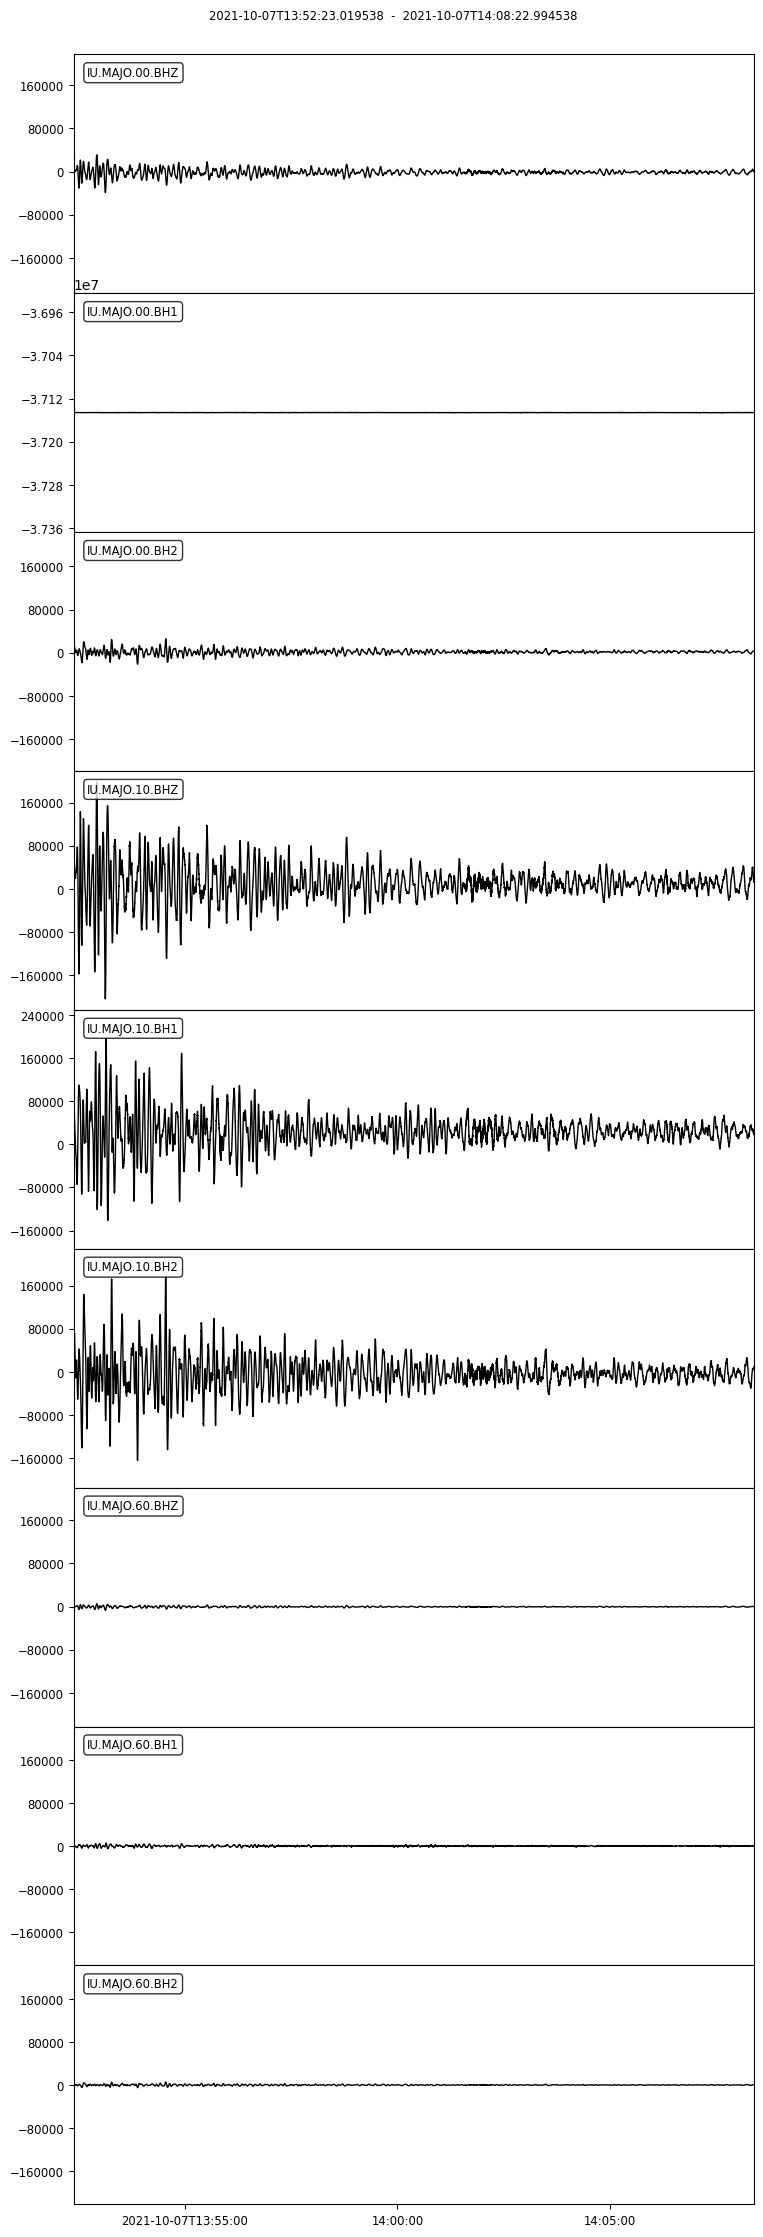

In [23]:
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime)
print(st)
st.plot();

9 Trace(s) in Stream:
IU.MAJO.00.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.00.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.00.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.969538Z | 20.0 Hz, 19200 samples
IU.MAJO.10.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.10.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.10.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BH1 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BH2 | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples
IU.MAJO.60.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples


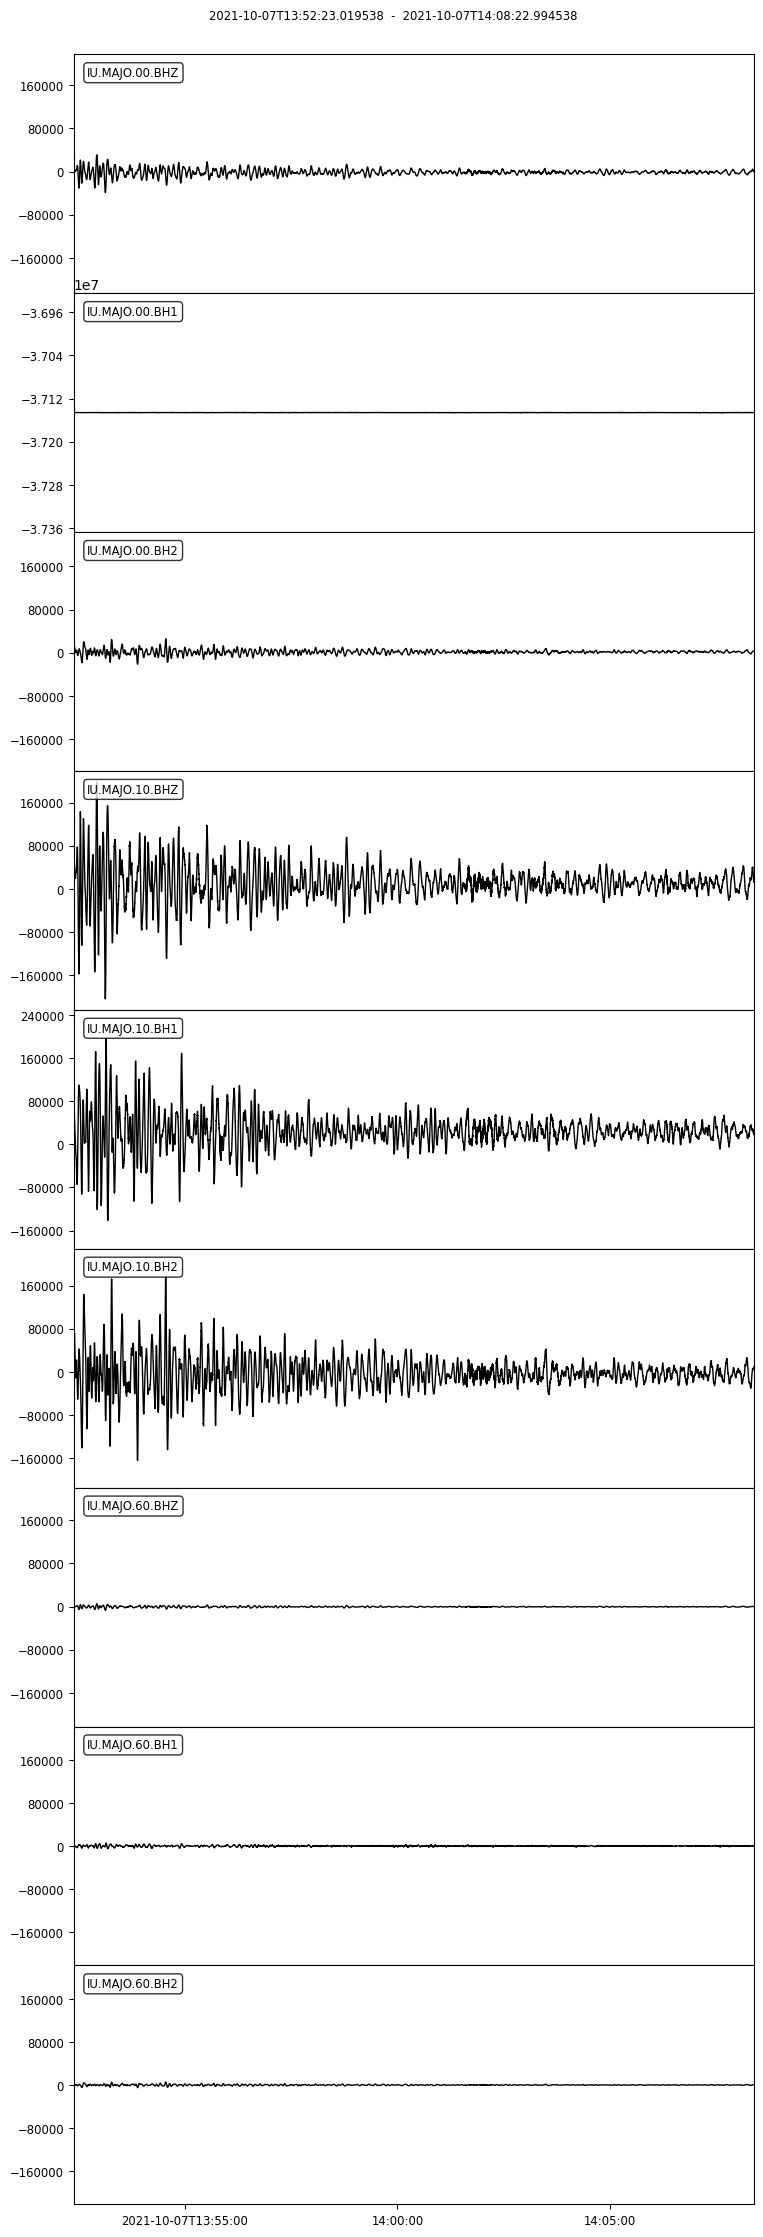

In [24]:
st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(st)
st.plot();

In [14]:
import numpy as np
from scipy import fftpack

In [32]:
net = 'IU'
sta = 'MAJO'
loc = '10'
chan = 'BHZ'

1 Trace(s) in Stream:
IU.MAJO.10.BHZ | 2021-10-07T13:52:23.019538Z - 2021-10-07T14:08:22.994538Z | 40.0 Hz, 38400 samples


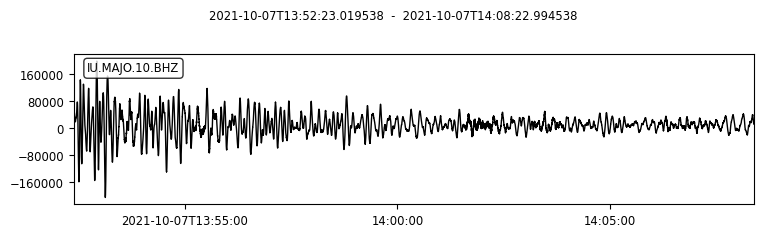

In [34]:
dt_10_BHZ = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(dt_10_BHZ)
dt_10_BHZ.plot();

In [35]:
datafreq_10_BHZ = fftpack.fft(dt_10_BHZ)
print(datafreq_10_BHZ)

[[  3.87820745e+08      -0.j           4.03777161e+06-1345729.04171536j
    3.73522662e+06 -727206.79437225j ...,
    3.42156965e+06 +539126.22342869j   3.73522662e+06 +727206.79437225j
    4.03777161e+06+1345729.04171536j]]


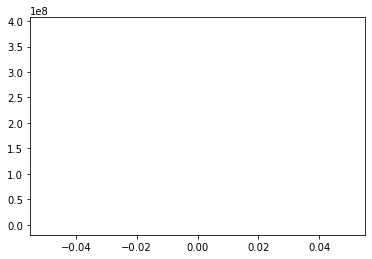

In [36]:
import matplotlib.pyplot as plt

plt.plot(np.abs(datafreq_10_BHZ))
plt.show()

1 Trace(s) in Stream:
AU.MCQ.00.BHN | 2021-10-07T13:52:23.000000Z - 2021-10-07T14:08:23.000000Z | 40.0 Hz, 38401 samples


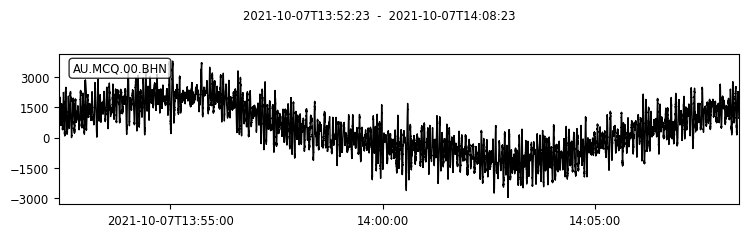

In [43]:
net = 'AU'
sta = 'MCQ'
loc = '00'
chan = 'BHN'

dt_10_BHN = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)
print(dt_10_BHN)
dt_10_BHN.plot();

In [48]:
spectrum = obspy.signal.freqattributes.spectrum()

NameError: name 'obspy' is not defined

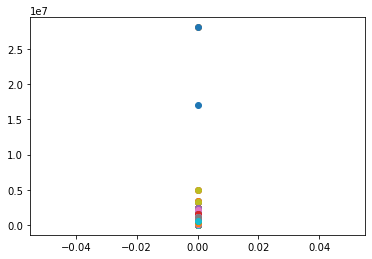

In [47]:
plt.plot(np.abs(datafreq_10_BHN), "o")
plt.show()

In [25]:
datainvfreq = fftpack.ifft(datafreq)

In [26]:
print(datainvfreq)

[[ 121148. +3.88051073e-13j  119127. -1.80383116e-12j
   116887. -3.88657403e-12j ...,   18111. +5.01005525e-12j
    18010. +4.86118933e-12j   17966. +1.15626764e-11j]
 [  12957. +3.88051073e-13j   15274. -1.83642139e-12j
    17635. +2.91227783e-12j ...,    8199. -1.99950306e-12j
     8388. +3.75806940e-12j    8790. -4.56240218e-13j]
 [  15235. -5.43271502e-12j   16936. -3.15888353e-12j
    18525. -1.93873954e-12j ...,   14269. -1.07997871e-11j
    13648. -3.32529609e-13j   12693. -8.52168117e-12j]]


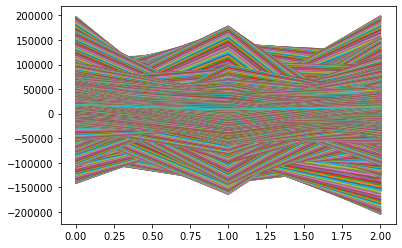

In [27]:
plt.plot(np.real(datainvfreq))
plt.show()